In [32]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Main1- Captioning to CSV

In [4]:
# Read JSON file
import json
import pandas as pd

# Read JSON file
img_name = []
label = []
with open('from_amit/data2x/captioning_output.json') as f:
    data = json.load(f)
    
    for item in data:
        img_name.append(item['captioning'].split('-')[1])
        label.append(item['caption'])

In [5]:
# Create dataframe
df = pd.DataFrame({'img_name': img_name, 'label': label})

In [6]:
#Sort df by img_name
df = df.sort_values(by=['img_name'])

In [7]:
df.to_csv('from_amit/data2x/captioning_ground_truth.csv', index=False)

In [8]:
df

,img_name,label
19,amit_second_image1.png,4+6/70
10,amit_second_image10.png,708-47
9,amit_second_image11.png,87+6-7
8,amit_second_image12.png,4+4-4/4
7,amit_second_image13.png,6+6-6/6
6,amit_second_image14.png,7+7-7/7
5,amit_second_image15.png,0/0+0-0
4,amit_second_image16.png,0*4+6-0
3,amit_second_image17.png,7+6-0+4
2,amit_second_image18.png,6+0-7/4


### Counting the instances for individual folder

In [20]:
import os
from collections import Counter

folder = 'from_mary/data2x/for_bbox'

image_name_list = os.listdir(folder)

df_only_bbox = pd.read_csv('from_mary/captioning_ground_truth2x.csv')

df_only_bbox = df_only_bbox[df_only_bbox['img_name'].isin(image_name_list)]

In [21]:
all_vals = df_only_bbox['label'].values
new_dict = Counter(all_vals[0])

for val in all_vals[1:]:
    new_dict.update(dict(Counter(val)))

In [22]:
new_dict

Counter({'3': 183,
         '4': 80,
         '5': 130,
         '*': 193,
         '7': 109,
         '/': 62,
         '8': 155,
         '1': 220,
         '2': 153,
         '-': 146,
         '9': 131,
         '6': 102,
         '+': 45,
         '0': 35})

### Grand total for all folders

In [23]:
from collections import Counter

def send_count_back(c_ob, to_count):
    for val in to_count:
        c_ob.update(dict(Counter(val)))
        
new_c = Counter()

for folder in ['from_amit', 'from_haneesh', 'from_mary']:
    df_only_bbox = pd.read_csv(f'{folder}/captioning_ground_truth.csv')
    image_name_list = os.listdir(f'{folder}/for_bbox')
    
    df_only_bbox = df_only_bbox[df_only_bbox['img_name'].isin(image_name_list)]
    
    all_vals = df_only_bbox['label'].values
    
    send_count_back(new_c, all_vals)

print(new_c)

Counter({'1': 323, '2': 315, '3': 277, '9': 265, '*': 235, '4': 232, '-': 225, '8': 223, '+': 222, '0': 213, '7': 206, '5': 197, '6': 187, '/': 170})


In [26]:
for key, val in new_c.items():
    print(f'{key} : {new_c[key]+new_dict[key]}')

2 : 468
3 : 460
- : 371
4 : 312
+ : 267
8 : 378
9 : 396
/ : 232
5 : 327
6 : 289
0 : 248
* : 428
1 : 543
7 : 315


### Ground truth train_test split

#### Output checks

In [6]:
df['label'].apply(len).sum()

2021

In [7]:
for val in df.label.values:
    if ' ' in val:
        print(val)

In [8]:
for val in df.label.values:
    if 'x' in val:
        print(val)

## Main2 - BBox to CSV

In [14]:
import os

folder = 'combined_data'

for sub_folder in os.listdir(folder):
    for file in os.listdir(folder + '/' + sub_folder):
        os.remove(folder + '/' + sub_folder + '/' + file)

In [12]:
import json
import os
import cv2

image_dir = 'from_amit/data2x/all_images'
save_dir = 'from_amit/data2x/symbols from original_data'
namess = []
counter = 1
# Read JSON file
with open('from_amit/data2x/bbox_output.json') as f:
    data = json.load(f)
    
    for item in data:
        img_name = item['image'].split('-')[1]
        #read image
        img = cv2.imread(os.path.join(image_dir, img_name))

        #get bounding box coordinates, as x, y and width, height
        for values in item['label']:
            x = int((values['x']*values['original_width'])/ 100)
            y = int((values['y']*values['original_height'])/ 100)
            w = int((values['width']*values['original_width'])/ 100)
            h = int((values['height']*values['original_height'])/ 100)

            #crop image
            crop_img = img[y:y+h, x:x+w]
            lab = values['rectanglelabels'][0]

            save_name = lab+'_'+str(counter)+'.png'
            namess.append(save_name)
            #save cropped image
            cv2.imwrite(os.path.join(save_dir, lab, save_name), crop_img)
            counter += 1

### Getting count of each symbol

In [13]:
import os

main_folder = 'from_haneesh/data2x/symbols from original_data'

listy = []

for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    count = len(os.listdir(folder_path))
    listy.append((folder, count))

In [8]:
listy

[('add', 38),
 ('divide', 39),
 ('eight', 8),
 ('five', 14),
 ('four', 68),
 ('multiply', 1),
 ('nine', 7),
 ('one', 17),
 ('seven', 60),
 ('six', 43),
 ('subtract', 29),
 ('three', 14),
 ('two', 16),
 ('zero', 36)]

### Bringing all annotations together

In [60]:
type(img.min())

numpy.uint8

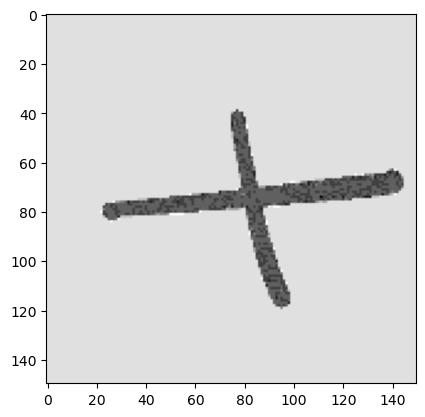

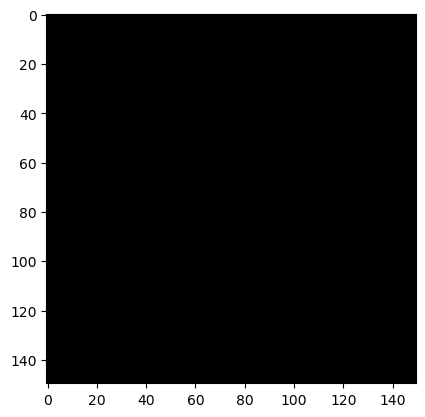

In [61]:
img = cv2.imread('combined_data_refined/add/3283add_385.png', 0)

out, out2 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(out2, cmap='gray')
plt.show()

In [55]:
img.min()

216

In [31]:
import os

folder = 'combined_data_plus_previous/'

for sub_folder in os.listdir(folder):
    for file in os.listdir(folder + '/' + sub_folder):
        os.remove(folder + '/' + sub_folder + '/' + file)

In [25]:
import os
import shutil

from_copy = ['mary', 'amit', 'haneesh']

to_copy = 'combined_data'

# copy images from each folder to to_copy folder

counter = 1
for folder in from_copy:
    path1 = f'from_{folder}/data1x/symbols from original_data'
    path2 = f'from_{folder}/data2x/symbols from original_data'

    for folder1 in os.listdir(path1):
        final_path = path1 + '/' + folder1
        print(final_path)
        for img in os.listdir(final_path):
            shutil.copy(path1 + '/' + folder1 + '/' + img, to_copy + '/' + folder1 + '/' + str(counter) + img)
            counter+=1

    for folder2 in os.listdir(path2):
        final_path = path2 + '/' + folder2
        print(final_path)
        for img in os.listdir(final_path):
            shutil.copy(path2 + '/' + folder2 + '/' + img, to_copy + '/' + folder2 + '/' + str(counter) + img)

from_mary/data1x/symbols from original_data/add
from_mary/data1x/symbols from original_data/divide
from_mary/data1x/symbols from original_data/eight
from_mary/data1x/symbols from original_data/five
from_mary/data1x/symbols from original_data/four
from_mary/data1x/symbols from original_data/multiply
from_mary/data1x/symbols from original_data/nine
from_mary/data1x/symbols from original_data/one
from_mary/data1x/symbols from original_data/seven
from_mary/data1x/symbols from original_data/six
from_mary/data1x/symbols from original_data/subtract
from_mary/data1x/symbols from original_data/three
from_mary/data1x/symbols from original_data/two
from_mary/data1x/symbols from original_data/zero
from_mary/data2x/symbols from original_data/add
from_mary/data2x/symbols from original_data/divide
from_mary/data2x/symbols from original_data/eight
from_mary/data2x/symbols from original_data/five
from_mary/data2x/symbols from original_data/four
from_mary/data2x/symbols from original_data/multiply
from_

### Combining new images with older ones

In [29]:
import os
import shutil

# copy images from main_folder to second_folder

main_folder = 'combined_data'
second_folder = 'combined_data_plus_previous'

for folder in os.listdir(main_folder):
    for img in os.listdir(main_folder + '/' + folder):
        shutil.copy(main_folder + '/' + folder + '/' + img, second_folder + '/' + folder + '/' + img)

In [30]:
import os
import shutil

# get file count of each subfoler in a dictionary for main_folder

main_folder = 'combined_data_plus_previous'

subfolder_file_count = {}

for subfolder in os.listdir(main_folder):
    subfolder_file_count[subfolder] = len(os.listdir(main_folder + '/' + subfolder))
    
subfolder_file_count

{'add': 943,
 'divide': 895,
 'eight': 870,
 'five': 825,
 'four': 887,
 'multiply': 1061,
 'nine': 888,
 'one': 1044,
 'seven': 879,
 'six': 835,
 'subtract': 1041,
 'three': 959,
 'two': 969,
 'zero': 779}